# Import Libraries

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense,Activation,Flatten,Dropout,BatchNormalization,Conv2D,MaxPool2D,MaxPooling2D
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow .keras.utils import to_categorical
from tensorflow import keras

# Load Data

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print("Shape of X_train :", X_train.shape)
print('Shape of X_test :' ,X_test.shape)


Shape of X_train : (50000, 32, 32, 3)
Shape of X_test : (10000, 32, 32, 3)


In [ ]:
print(y_train.shape)
y_train

(50000, 1)


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_train  .dtype

dtype('uint8')

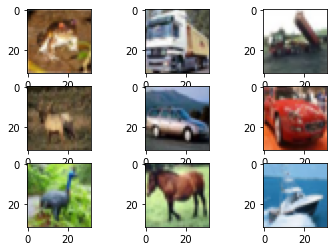

In [ ]:
# plot first few images

for i in range(9):
    pyplot.subplot(3,3, i+1)
    pyplot.imshow(X_train[i])

In [ ]:
# 0 --> 255.
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
# Rescale Input
X_train =X_train /255.0
X_test  = X_test/255.0

In [ ]:
# to_categorical
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
mean = X_train.mean(axis=0)
std  = X_train.std(axis=0)

def preprocess_data(data_set):
    # preprocess_data
    data_set=data_set.astype("float32")
    data_set-=mean
    data_set/=std

    return data_set

X_train = preprocess_data(X_train)
X_test  = preprocess_data(X_test)

In [ ]:
X_train.max(), X_train.min()

(2.625075, -2.2074292)

In [ ]:
# Hyperparameters
BATCH_SIZE  = 100
NUM_CLASSES = 10
EPOCHS      = 35

# Assignment 01
- Design your own `deep NN` to classify the `CIFAR 10` images (you can download from keras.dataset) into one of the 10 classes
- Investigate the use of different architectures (`different layers`, `learning rate`, `optimizers`, `loss function`)
- Note you will need to `flatten` the image and use it as your input vector

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train.shape[1:] # 32 x 32 x 3  --> 3072

(32, 32, 3)

In [ ]:
from matplotlib.cbook import flatten
from tensorflow.python.keras.models import sequential
model_1 = Sequential()
model_1.add(Flatten(input_shape=X_train.shape[1:]))
model_1.add(Dense(10_000, activation='relu'))
model_1.add(Dense(1_000, activation='relu'))
model_1.add(Dense(100, activation='relu'))
model_1.add(Dense(10, activation='softmax'))
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 10000)             30730000  
                                                                 
 dense_5 (Dense)             (None, 1000)              10001000  
                                                                 
 dense_6 (Dense)             (None, 100)               100100    
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 40,832,110
Trainable params: 40,832,110
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(X_train, y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_split=0.1)

Epoch 1/35
450/450 [==============================] - 11s 13ms/step - loss: 1.6724 - accuracy: 0.4129 - val_loss: 1.5586 - val_accuracy: 0.4528
Epoch 2/35
450/450 [==============================] - 5s 12ms/step - loss: 1.4026 - accuracy: 0.5133 - val_loss: 1.4936 - val_accuracy: 0.4830
Epoch 3/35
450/450 [==============================] - 5s 11ms/step - loss: 1.2539 - accuracy: 0.5671 - val_loss: 1.3960 - val_accuracy: 0.5132
Epoch 4/35
450/450 [==============================] - 6s 14ms/step - loss: 1.1344 - accuracy: 0.6141 - val_loss: 1.3585 - val_accuracy: 0.5304
Epoch 5/35
450/450 [==============================] - 5s 12ms/step - loss: 1.0252 - accuracy: 0.6552 - val_loss: 1.3438 - val_accuracy: 0.5276
Epoch 6/35
450/450 [==============================] - 5s 12ms/step - loss: 0.9192 - accuracy: 0.6943 - val_loss: 1.3637 - val_accuracy: 0.5306
Epoch 7/35
450/450 [==============================] - 5s 12ms/step - loss: 0.8223 - accuracy: 0.7324 - val_loss: 1.3933 - val_accuracy: 0.513

In [ ]:
model_1.metrics_names

['loss', 'accuracy']

In [ ]:
from tensorflow.python.keras.metrics import accuracy
_,accuracy_train=model_1.evaluate(X_train, y_train)
_,accuracy_test=model_1.evaluate(X_test, y_test)
print("Accuracy for training: %.2f" % (accuracy_train*100))
print("Accuracy for testing: %.2f" % (accuracy_test*100))

313/313 [==============================] - 1s 4ms/step - loss: 1.9741 - accuracy: 0.5674
Accuracy for training: 95.74
Accuracy for testing: 56.74


In [ ]:
history_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

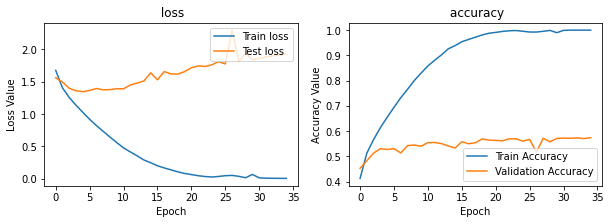

In [ ]:
# Plot the training accuracy and loss
def plot_history(history):

    plt.figure(figsize=(10,3))
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(' loss')
    plt.ylabel('Loss Value')
    plt.xlabel('Epoch')
    plt.legend(['Train loss', 'Test loss'], loc='upper right')




    plt.subplot(122)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(' accuracy')
    plt.ylabel('Accuracy Value')
    plt.xlabel('Epoch')
    plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
    plt.show()
plot_history(history_1)

In [ ]:
model_1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(X_train, y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_split=0.1)

Epoch 1/35
450/450 [==============================] - 7s 13ms/step - loss: 2.9147 - accuracy: 0.1056 - val_loss: 2.3058 - val_accuracy: 0.0950
Epoch 2/35
450/450 [==============================] - 5s 12ms/step - loss: 2.3032 - accuracy: 0.1006 - val_loss: 2.3033 - val_accuracy: 0.0950
Epoch 3/35
450/450 [==============================] - 6s 13ms/step - loss: 2.3027 - accuracy: 0.1006 - val_loss: 2.3028 - val_accuracy: 0.0950
Epoch 4/35
450/450 [==============================] - 6s 13ms/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3029 - val_accuracy: 0.0950
Epoch 5/35
450/450 [==============================] - 6s 12ms/step - loss: 2.3183 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.0950
Epoch 6/35
450/450 [==============================] - 6s 13ms/step - loss: 2.3027 - accuracy: 0.0965 - val_loss: 2.3029 - val_accuracy: 0.0950
Epoch 7/35
450/450 [==============================] - 6s 12ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.0976

In [ ]:
from tensorflow.python.keras.metrics import accuracy
_,accuracy_train=model_1.evaluate(X_train, y_train)
_,accuracy_test=model_1.evaluate(X_test, y_test)
print("Accuracy for training: %.2f" % (accuracy_train*100))
print("Accuracy for testing: %.2f" % (accuracy_test*100))

313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1000
Accuracy for training: 10.00
Accuracy for testing: 10.00


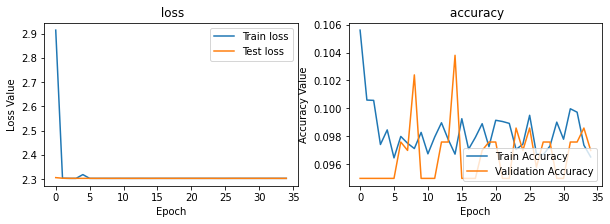

In [ ]:
# Plot the training accuracy and loss
def plot_history(history):

    plt.figure(figsize=(10,3))
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(' loss')
    plt.ylabel('Loss Value')
    plt.xlabel('Epoch')
    plt.legend(['Train loss', 'Test loss'], loc='upper right')




    plt.subplot(122)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(' accuracy')
    plt.ylabel('Accuracy Value')
    plt.xlabel('Epoch')
    plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
    plt.show()
plot_history(history_1)

# Assignment 02
- Design your `deep convolutional neural network` ( to classify the `CIFAR 10` images into one of the 10 classes
- Invistage the use of different architectures (different `layers`, `kernel sizes`, `pooling`, `learning rate`, `optimizers`, `loss function`)

You have to specify filters and kernel_size. These parameters have no default.

Default padding is valid, which means no zero-padding, and the default strides is (1,1).

# (N - F + 2P)/S   +  1

# P =  (F - 1) / 2

In [ ]:
X_train.shape[1:]

(32, 32, 3)

In [ ]:
model_2 = Sequential()
model_2.add(Conv2D(32, (3,3), input_shape=(X_train.shape[1:]), activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Conv2D(32, (3,3), activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Conv2D(32, (3,3), activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Conv2D(32, (3,3), activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Flatten())
model_2.add(Dense(10, activation='softmax'))

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 dropout_2 (Dropout)         (None, 26, 26, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)       

In [ ]:
# Hyperparameters
BATCH_SIZE  = 100
EPOCHS      = 35

In [ ]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history_2 = model_2.fit(X_train, y_train, epochs=EPOCHS,batch_size=BATCH_SIZE, validation_split=0.1)

Epoch 1/35
450/450 [==============================] - 14s 13ms/step - loss: 1.5423 - accuracy: 0.4477 - val_loss: 1.3036 - val_accuracy: 0.5280
Epoch 2/35
450/450 [==============================] - 5s 12ms/step - loss: 1.1656 - accuracy: 0.5889 - val_loss: 1.0534 - val_accuracy: 0.6264
Epoch 3/35
450/450 [==============================] - 5s 12ms/step - loss: 1.0094 - accuracy: 0.6455 - val_loss: 0.9866 - val_accuracy: 0.6660
Epoch 4/35
450/450 [==============================] - 5s 12ms/step - loss: 0.9115 - accuracy: 0.6791 - val_loss: 0.9387 - val_accuracy: 0.6680
Epoch 5/35
450/450 [==============================] - 5s 12ms/step - loss: 0.8458 - accuracy: 0.7040 - val_loss: 0.8568 - val_accuracy: 0.7018
Epoch 6/35
450/450 [==============================] - 5s 12ms/step - loss: 0.7841 - accuracy: 0.7244 - val_loss: 0.8956 - val_accuracy: 0.6926
Epoch 7/35
450/450 [==============================] - 6s 13ms/step - loss: 0.7354 - accuracy: 0.7427 - val_loss: 0.8526 - val_accuracy: 0.710

In [ ]:
model_2.metrics_names

['loss', 'accuracy']

In [ ]:

history_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
from tensorflow.python.keras.metrics import accuracy
_,accuracy_train=model_2.evaluate(X_train, y_train)
_,accuracy_test=model_2.evaluate(X_test, y_test)
print("Accuracy for training: %.2f" % (accuracy_train*100))
print("Accuracy for testing: %.2f" % (accuracy_test*100))

313/313 [==============================] - 1s 3ms/step - loss: 1.1538 - accuracy: 0.6934
Accuracy for training: 94.15
Accuracy for testing: 69.34


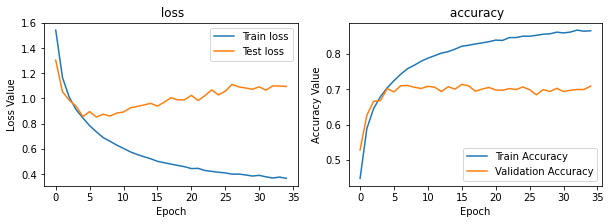

In [ ]:
# Plot the training accuracy and loss
plot_history(history_2)



---

# Assignment 03
- Repeat Assignment 1 and 2 using MNIST dataset
- Note that you will need to convert the training labels into categorical using one hot encoding using `to_categorical()` function

# Load Data

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print('Shape of X_train :', X_train.shape)
print('Shape of X_test:',X_test.shape)

Shape of X_train : (60000, 28, 28)
Shape of X_test: (10000, 28, 28)


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# OR use 'sparse_categorical_crossentropy' in the [LOSS Function]
'''
i will used sparse_categorical_crossentropy


'''


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train.shape

(60000, 10)

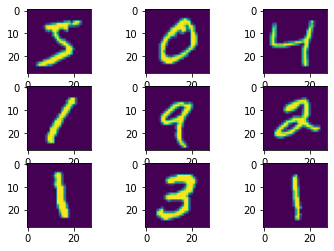

In [ ]:
# plot first few images

for i in range(9):
    pyplot.subplot(3,3, i+1)
    pyplot.imshow(X_train[i])


In [ ]:
# Rescale the Input
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [ ]:
X_train.max(), X_train.min()

(1.0, 0.0)

In [ ]:
# Hyperparameters
BATCH_SIZE  = 100
NUM_CLASSES = None
EPOCHS      = 10

### ANN

In [ ]:
model_3 = Sequential()
model_3.add(Flatten(input_shape=(X_train.shape[1:])))
model_3.add(Dense(128, activation="relu"))
model_3.add(Dense(128, activation="relu"))
model_3.add(Dense(units=10, activation="softmax"))
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(X_train, y_train, epochs=EPOCHS,batch_size=BATCH_SIZE,validation_split=0.1)

Epoch 1/10
540/540 [==============================] - 2s 4ms/step - loss: 0.0149 - accuracy: 0.9957 - val_loss: 0.0946 - val_accuracy: 0.9770
Epoch 2/10
540/540 [==============================] - 2s 3ms/step - loss: 0.0113 - accuracy: 0.9968 - val_loss: 0.1109 - val_accuracy: 0.9728
Epoch 3/10
540/540 [==============================] - 2s 3ms/step - loss: 0.0121 - accuracy: 0.9962 - val_loss: 0.1083 - val_accuracy: 0.9762
Epoch 4/10
540/540 [==============================] - 2s 3ms/step - loss: 0.0088 - accuracy: 0.9975 - val_loss: 0.1163 - val_accuracy: 0.9762
Epoch 5/10
540/540 [==============================] - 2s 3ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.1101 - val_accuracy: 0.9763
Epoch 6/10
540/540 [==============================] - 2s 3ms/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.1190 - val_accuracy: 0.9745
Epoch 7/10
540/540 [==============================] - 2s 3ms/step - loss: 0.0127 - accuracy: 0.9957 - val_loss: 0.1171 - val_accuracy: 0.9763
Epoch 

In [ ]:
model_1.metrics_names

['loss', 'accuracy']

In [ ]:

from tensorflow.python.keras.metrics import accuracy
_,accuracy_train=model_3.evaluate(X_train, y_train)
_,accuracy_test=model_3.evaluate(X_test, y_test)
print("Accuracy for training: %.2f" % (accuracy_train*100))
print("Accuracy for testing: %.2f" % (accuracy_test*100))


313/313 [==============================] - 1s 3ms/step - loss: 0.1223 - accuracy: 0.9754
Accuracy for training: 99.76
Accuracy for testing: 97.54


In [ ]:
history_3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

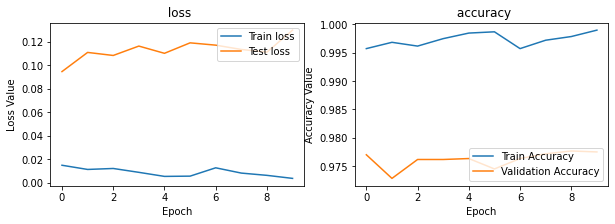

In [ ]:
# Plot the training accuracy and loss


plot_history(history_3)

### CNN

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
model_4 = Sequential()
model_4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_4.add(MaxPooling2D((2, 2)))
model_4.add(Conv2D(64, (3, 3), activation='relu'))
model_4.add(MaxPooling2D((2, 2)))
model_4.add(Conv2D(64, (3, 3), activation='relu'))
model_4.add(Flatten())
model_4.add(Dense(64, activation='relu'))
model_4.add(Dense(10, activation='softmax'))

model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

In [ ]:
model_4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_4 = model_4.fit(X_train, y_train, epochs=EPOCHS,batch_size=BATCH_SIZE,validation_split=0.1)

Epoch 1/10
540/540 [==============================] - 5s 5ms/step - loss: 0.2890 - accuracy: 0.9125 - val_loss: 0.0735 - val_accuracy: 0.9775
Epoch 2/10
540/540 [==============================] - 3s 5ms/step - loss: 0.0745 - accuracy: 0.9771 - val_loss: 0.0612 - val_accuracy: 0.9815
Epoch 3/10
540/540 [==============================] - 2s 4ms/step - loss: 0.0543 - accuracy: 0.9829 - val_loss: 0.0548 - val_accuracy: 0.9840
Epoch 4/10
540/540 [==============================] - 2s 4ms/step - loss: 0.0415 - accuracy: 0.9870 - val_loss: 0.0567 - val_accuracy: 0.9835
Epoch 5/10
540/540 [==============================] - 2s 4ms/step - loss: 0.0347 - accuracy: 0.9889 - val_loss: 0.0424 - val_accuracy: 0.9872
Epoch 6/10
540/540 [==============================] - 2s 5ms/step - loss: 0.0274 - accuracy: 0.9909 - val_loss: 0.0387 - val_accuracy: 0.9892
Epoch 7/10
540/540 [==============================] - 3s 5ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0398 - val_accuracy: 0.9895
Epoch 

In [ ]:
model_4.metrics_names

['loss', 'accuracy']

In [ ]:

from tensorflow.python.keras.metrics import accuracy
_,accuracy_train=model_4.evaluate(X_train, y_train)
_,accuracy_test=model_4.evaluate(X_test, y_test)
print("Accuracy for training: %.2f" % (accuracy_train*100))
print("Accuracy for testing: %.2f" % (accuracy_test*100))


313/313 [==============================] - 1s 4ms/step - loss: 0.0363 - accuracy: 0.9907
Accuracy for training: 99.66
Accuracy for testing: 99.07


In [ ]:
history_3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

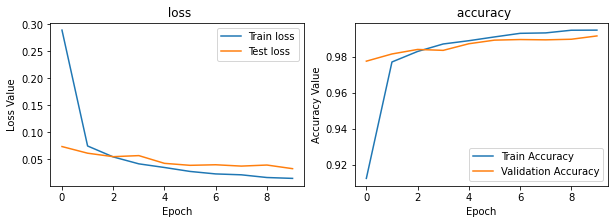

In [ ]:
# Plot the training accuracy and loss

plot_history(history_4)
